# Assignment 1

### CS2545 - Data Science ###
### Fall, 2021 ###
### UNB, Fredericton ###

Please complete the following and submit this notebook (filename: Assignment1-**lastname**-**firstname**.ipynb) to D2L by 5 pm, November 5. 
</br>
</br>
</br>

**Q1.0** Download the *countries.csv*  and *world_gdp_2019.csv* files from D2L in the current folder. Load them into two dataframes and show first 5 rows.






In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load countries.csv
countriesdf = pd.read_csv('countries.csv', delimiter = ';')
countriesdf.head()

,Country,Population,Area,Currency
0,Afghanistan,32564342,652230,Afghani
1,Egypt,88487396,1001450,Pfund
2,Albania,3029278,28748,Lek
3,Algeria,39542166,2381741,Dinar
4,American Samoa,54343,199,Dollar


In [13]:
# load world_gdp_2019.csv
wdf = pd.read_csv('world_gdp_2019.csv', delimiter = ';')
wdf.head()

,Country Name,Country Code,GDP_US$
0,Aruba,ABW,NaN
1,Afghanistan,AFG,1.929110e+10
2,Angola,AGO,8.941719e+10
3,Albania,ALB,1.528661e+10
4,Andorra,AND,3.155065e+09


**Q1.1** Using the dataframes created in Q1.0, answer the following.

* a. Create a dataframe *cn_gdp* that shows the countries and their GDPs by joining the two dataframes above. Note that you need to show all the countries in *country* dataframe even if there is no information in *gdp* dataframe.  

* b. Remove the rows where the *GDP_US$* columns shows a *NaN* value. 

In [14]:
# Q1.1 a

cn_gdp = pd.merge(countriesdf,wdf, left_on = 'Country', right_on='Country Name', how = 'left')
cn_gdp = cn_gdp[['Country', 'GDP_US$']]
cn_gdp

,Country,GDP_US$
0,Afghanistan,1.929110e+10
1,Egypt,3.030810e+11
2,Albania,1.528661e+10
3,Algeria,1.711580e+11
4,American Samoa,6.380000e+08
...,...,...
241,Wallis and Futuna,NaN
242,Christmas Island,NaN
243,Western Sahara,NaN
244,Central African Republic,2.220307e+09


In [15]:
# Q1.1 b
cn_gdp = cn_gdp.dropna(subset = ['GDP_US$'])
cn_gdp

,Country,GDP_US$
0,Afghanistan,1.929110e+10
1,Egypt,3.030810e+11
2,Albania,1.528661e+10
3,Algeria,1.711580e+11
4,American Samoa,6.380000e+08
...,...,...
238,United States,2.143320e+13
239,United Kingdom,2.830810e+12
240,Vietnam,2.619210e+11
244,Central African Republic,2.220307e+09


**Q2.1** Add a column *IncomeGroup* to the dataframe *cn_gdp* based on the  GDP of the country and  GDP ranges and the corresponding income group labels below.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-1wig" colspan="2"> GDP range</th>
    <th class="tg-0lax" rowspan="2">Income group</th>
  </tr>
  <tr>
    <td class="tg-1wig">Min GDP</td>
    <td class="tg-1wig">Max GDP</td>
  </tr>
  <tr>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">5.0e+08</td>
    <td class="tg-0lax">low</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.0e+08</td>
    <td class="tg-0lax">5.0e+09</td>
    <td class="tg-0lax">lower middle</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.0e+09</td>
    <td class="tg-0lax">5.0e+10</td>
    <td class="tg-0lax">middle</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.0e+10</td>
    <td class="tg-0lax">5e+11</td>
    <td class="tg-0lax">upper middle</td>
  </tr>
  <tr>
    <td class="tg-0lax">5e+11</td>
    <td class="tg-0lax">5.0e+13</td>
    <td class="tg-0lax">high</td>
  </tr>
</table>

In [16]:
def getincomegroup(income) -> str:
    ig = ''
    if(income >= 0 and income <= 5.0e+08):
        ig = 'low'
    if(income > 5.0e+08 and income <= 5.0e+09):
        ig = 'lower middle'
    if(income > 5.0e+09 and income <= 5.0e+10):
        ig = 'middle'
    if (income > 5.0e+10 and income <= 5.0e+11):
        ig = 'upper middle'
    if(income > 5.0e+11 and income <= 5.0e+13):
        ig = 'high'
    return ig

cn_gdp['IncomeGroup'] = cn_gdp['GDP_US$'].apply(getincomegroup)
cn_gdp

<ipython-input-16-c9899813675b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn_gdp['IncomeGroup'] = cn_gdp['GDP_US$'].apply(getincomegroup)


,Country,GDP_US$,IncomeGroup
0,Afghanistan,1.929110e+10,middle
1,Egypt,3.030810e+11,upper middle
2,Albania,1.528661e+10,middle
3,Algeria,1.711580e+11,upper middle
4,American Samoa,6.380000e+08,lower middle
...,...,...,...
238,United States,2.143320e+13,high
239,United Kingdom,2.830810e+12,high
240,Vietnam,2.619210e+11,upper middle
244,Central African Republic,2.220307e+09,lower middle


**Q2.2**  Using the dataframe from above, group the countries by *IncomeGroup* column and show the average GDP for each income group.

In [10]:
cn_gdp = cn_gdp.groupby('IncomeGroup')
cn_gdpm = cn_gdp.mean()
cn_gdpm

,GDP_US$
IncomeGroup,
high,3.084490e+12
low,2.158974e+08
lower middle,2.118833e+09
middle,1.924676e+10
upper middle,1.939990e+11


**Q2.3**  Using the dataframe from Q2.1, group the countries by *IncomeGroup* column and plot a bar chart for the median GDP (GDP_US$) for each income group. The y-axis should be in log scale.

<AxesSubplot:xlabel='IncomeGroup'>

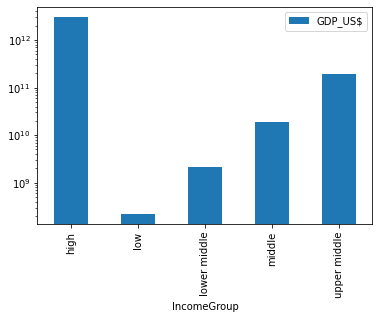

In [18]:
cn_gdpp = cn_gdp.groupby('IncomeGroup').mean()
cn_gdpp.plot.bar(logy = True)

**Q3.0** Download the *capitals.csv*  and *major_cities.csv* files from D2L in the current folder. Load them into two dataframes and show first 5 rows. The major cities are some of the cities with relatively large population. The capitals are capitals of the countries.


In [21]:
# Load capitals.csv

capitals = pd.read_csv('capitals.csv')
capitals.head()

,CapitalCity,Country,CountryCode,Latitude,Longitude
0,Abuja,Nigeria,NG,9.057850,7.495080
1,Accra,Ghana,GH,5.556020,-0.196900
2,Adamstown,Pitcairn Islands,PN,-25.066397,-130.100197
3,Addis Ababa,Ethiopia,ET,9.024970,38.746890
4,Algiers,Algeria,DZ,36.752500,3.041970


In [22]:
# Load major_cities.csv

mc = pd.read_csv('major_cities.csv')
mc.head()

,City,Country,CityPopulation
0,Shanghai,China,22315500
1,Karachi,Pakistan,13052000
2,Mumbai,India,12691800
3,Beijing,China,11716600
4,Istanbul,Turkey,11174300


**Q3.1** For each country that has a Megacity (i.e. city with population more than 10 million), show the name of country and the number of Megacities it has. Note, the countries should be sorted in descending order based on the number of megacities they have.

In [34]:
mcc = mc[mc['CityPopulation']>10000000]
mcc = mcc ['Country'].value_counts()
mcc.sort_values(ascending = False)

China          4
India          2
Brazil         1
Nigeria        1
South Korea    1
Turkey         1
Pakistan       1
Russia         1
Name: Country, dtype: int64

**Q3.2** For the countries each of whose capital is a major city, show the name of the top 7 capitals (ordered by thier capital city population) and the population of its capital, along with the correspinding country name.

In [40]:
mergd = pd.merge(capitals, mc, left_on = 'CapitalCity', right_on = 'City');
mergd = mergd.sort_values(by = 'CityPopulation', ascending = False)
mergd= mergd.drop(columns =['City'])
mergd.head(7)



,CapitalCity,Country_x,CountryCode,Latitude,Longitude,Country_y,CityPopulation
62,Beijing,China,CN,39.90750,116.39723,China,11716600
59,New Delhi,India,IN,28.63576,77.22445,India,10928000
56,Moscow,Russia,RU,55.75222,37.61556,Russia,10381200
75,Seoul,South Korea,KR,37.56600,126.97840,South Korea,10349300
33,Jakarta,Indonesia,ID,-6.21462,106.84513,Indonesia,9588200
43,Kinshasa,Democratic Republic of the Congo,CD,-4.32758,15.31357,Democratic Republic of the Congo,9463800
52,Mexico City,Mexico,MX,19.42847,-99.12766,Mexico,8851100


**Q4.0** For the questions Q4.1 and Q4.3, you will plot data on a map. If you have installed an Anaconda Python distribution in your local machine, you have to install basemap and plotly packages. If you are using FCS lab VM, then they are already installed in the VMs.


**Q4.1** From question Q3.2, plot the name of the top 7 capitals (i.e. by capital city population) in a map of the world.  Use the Basemap module for this.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap



ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

**Q4.2** Add a column *GDP_per_capita* to the dataframe *cn_gdp* in Q2.1 . This will be a calculated column based on the GDP per capita of each country.

**Q4.3** Using the above dataframe, create a choropleth map of the world based on the GDP per capita of each country. Use the plotly module for this.


In [ ]:
import plotly.graph_objects as go
import pandas as pd


